In [45]:
using DrWatson

In [46]:
include(srcdir("rdpg.jl"))
import Main.rdpg
using PersistenceDiagrams, Pipe, Plots, ProgressMeter, Random, Ripserer, Statistics, StatsBase
using LinearAlgebra, Distances, Distributions, LaTeXStrings

In [47]:
function generate_graph(n)
    Z = rdpg.randLemniscate(n, s=0.01)
    dist_max = pairwise(Distances.Euclidean(), Z |> rdpg.t2m) |> maximum
    f = (x, y) -> evaluate(Distances.Euclidean(), x, y) / (0.1 * dist_max)
    return rdpg.Adjacency(f, Z)
end

generate_graph (generic function with 1 method)

In [48]:
A = generate_graph(2500)
X, _ = rdpg.spectralEmbed(A, d=3, scale=false)
Dx = rdpg.diagram(X |> rdpg.m2t, dim_max=1);

In [60]:
ϵ = 1
B = (rdpg.edgeFlip(A; ϵ = ϵ) .- (rdpg.τ(ϵ)^2)) ./ (rdpg.σ(ϵ)^2)
Y, _ = rdpg.spectralEmbed(B; d = 3, scale = false, restarts=10000)
Dy = rdpg.diagram(Y |> rdpg.m2t, dim_max=1);

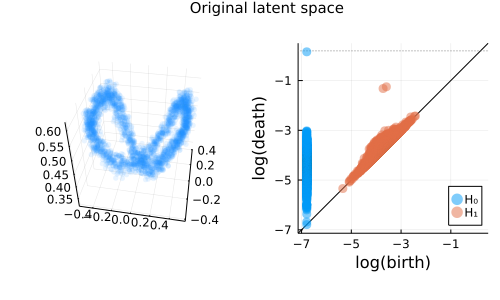

In [77]:
plot(
    plot(title = "Original latent space", grid = false, ticks=nothing, axis = false, bottom_margin = -30Plots.px, titlefontsize=10),
    scatter(X |> rdpg.m2t, c=:dodgerblue1, ms=3, ma=0.1, msw=0.0, camera=(10,40), label=false, padding=(0.0, 0.0, 0.0)),
    plot(Dx |> rdpg.log_transform_diagram, xlabel="log(birth)", ylabel="log(death)", title="", ms=5, ticks=[-7:2:1...]),
    size=(500, 300),
    layout = @layout([A{0.01h}; [B C]])
)

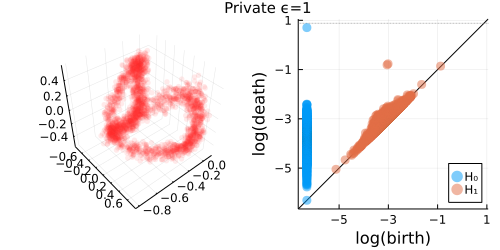

In [74]:
plot(
    plot(title = "Private ϵ=$ϵ", grid = false, ticks=nothing, axis = false, bottom_margin = -30Plots.px, titlefontsize=10),
    scatter(Y |> rdpg.m2t, c=:firebrick1, ms=3, ma=0.1, msw=0.0, camera=(50,40), label=false),
    plot(Dy |> rdpg.log_transform_diagram, xlabel="log(birth)", ylabel="log(death)", title="", ms=5, ticks=[-7:2:1...]),
    size=(500, 250),
    layout = @layout([A{0.01h}; [B C]])
)